In [1]:
print("monte carlo sim and financial mathematics")
import numpy as np 
import math 

monte carlo sim and financial mathematics


In [2]:
#linear congruence random generator of number frm (0 , N-1)
def fun(N , a , b , m , eed ):
    A = np.zeros(N)
    A[0]=eed % m
    for i in range(1 , N):
        A[i]=(a*A[i-1]+b) % m
    return A


In [3]:
def uniform(N , a , b , m , eed):
    A = np.zeros(N)
    A[0]=(eed % m)/m
    X = eed
    for i in range(1 , N):
        X = (a*X+b) % m
        A[i]=(X)/m
        if(X==0):
            X = (a*X+b) % m
            A[i]=(X)/m
    return A

In [4]:
import matplotlib.pyplot as plt 
def plotter(Y , bin_size):
    min_value, max_value = min(Y), max(Y)
    bins = np.arange(min_value, max_value + bin_size, bin_size)
    # Plot the histogram
    plt.hist(Y, bins=bins, edgecolor='black', alpha=0.7)
    plt.title("Frequency Distribution")
    plt.xlabel("Value Ranges")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [5]:
Y = uniform(10000 , 100 , 200 , 1000 , 10)


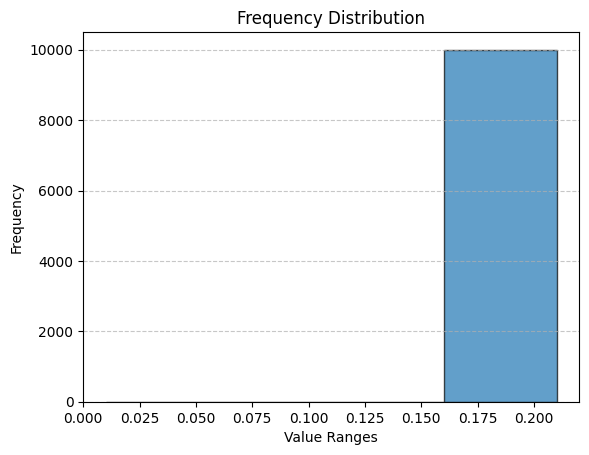

In [6]:
plotter(Y , 0.05)

In [7]:
#bad uniform generator 


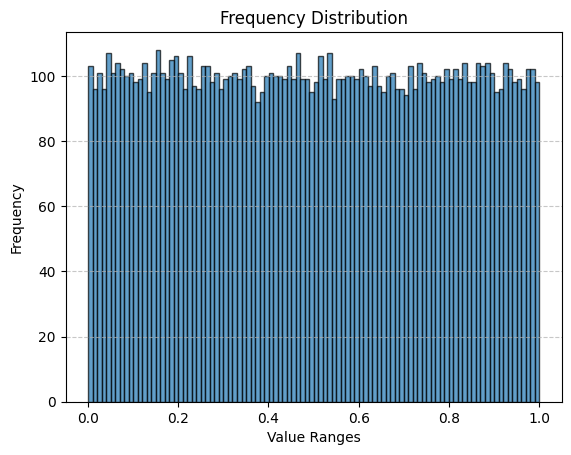

In [8]:
Z = uniform(10000 , 45 , 29 , 2**12  ,9)
plotter(Z , 0.01)

In [9]:
#better random number generator
#knuth law states c = odd a = 4n+1 , m power of 2 will give full period so better generator 

In [10]:
'''Consider the recursion:
Ui+1 = (Ui−17 − Ui−5).
In the event that Ui < 0, set Ui = Ui + 1. Choosing seed appropriately, perform following
parts.
(a) Use linear congruence generator to generate the first 17 values of Ui
.
(b) Then generate the values of U18, U19, . . . , UN for N = 1000, 10000, and 100000 based
on the recursion above.
(c) For each N, plot histogram. What are your observations?
(d) For each N, plot (Ui
, Ui+1). What are your observations'''

'Consider the recursion:\nUi+1 = (Ui−17 − Ui−5).\nIn the event that Ui < 0, set Ui = Ui + 1. Choosing seed appropriately, perform following\nparts.\n(a) Use linear congruence generator to generate the first 17 values of Ui\n.\n(b) Then generate the values of U18, U19, . . . , UN for N = 1000, 10000, and 100000 based\non the recursion above.\n(c) For each N, plot histogram. What are your observations?\n(d) For each N, plot (Ui\n, Ui+1). What are your observations'

In [11]:
U = uniform(17 , 149 , 729 , 2**12  ,91)

In [12]:
def recur( N , U ):
    A = np.zeros(N)
    for i in range(17):
        A[i] = U[i]
    for i in range(17 , N):
        A[i] = A[i-17]-A[i-5]
        if(A[i]<0):
            A[i]=A[i]+1
    return A

In [13]:
Z2 = recur(1000 , U )

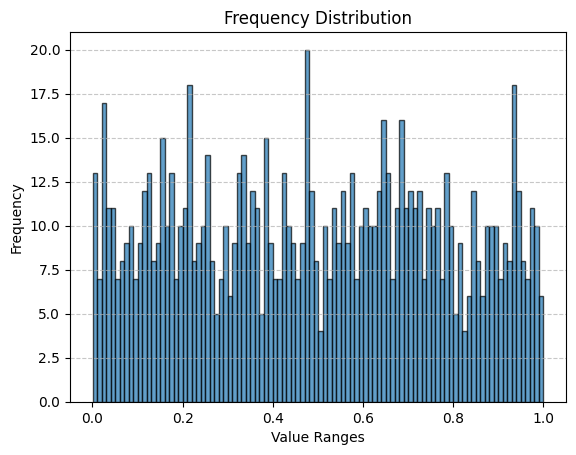

In [14]:
plotter(Z2 , 0.01)

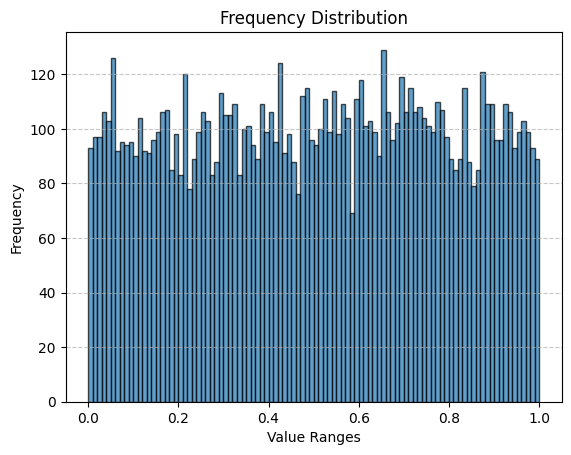

In [15]:
Z3 = recur(10000 , U )
plotter(Z3 , 0.01)

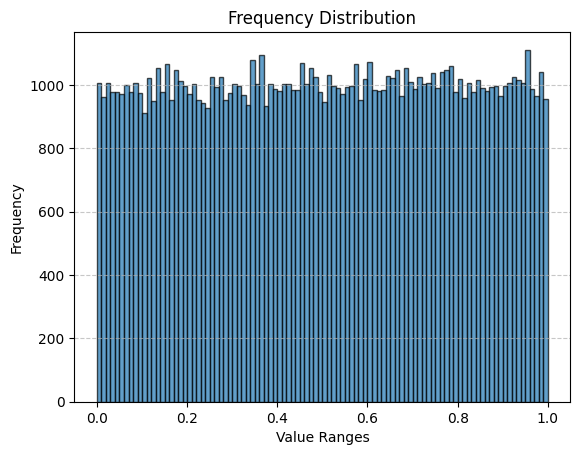

In [16]:
Z3 = recur(100000 , U )
plotter(Z3 , 0.01)

In [17]:
# by inverse transform method so we won't use manual lcg but in built 

In [18]:
''' f(x) = 3(1-x)**2
so F(x) = 1 - (1-x)**3'''

' f(x) = 3(1-x)**2\nso F(x) = 1 - (1-x)**3'

In [19]:
def gen(N):
    A = np.zeros(N)
    for i in range(N):
        u = np.random.uniform()
        A[i] = 1-(1-u)**(1/3)
    return A

In [20]:
Y = gen(100)
Z = gen(10000)
X = gen(100000)

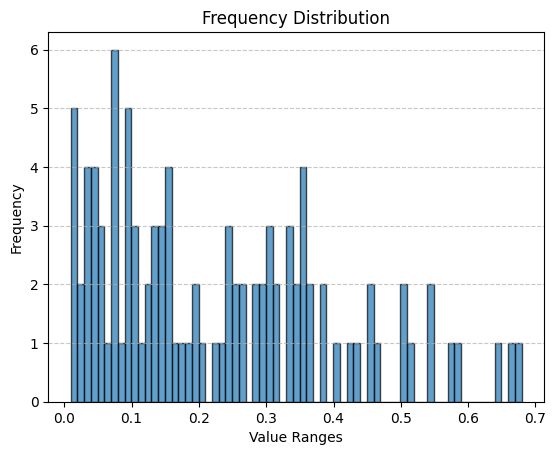

In [21]:
plotter(Y , 0.01)


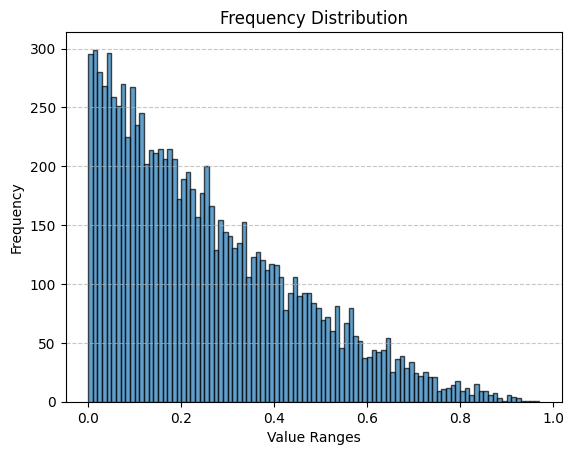

In [22]:
plotter(Z , 0.01)

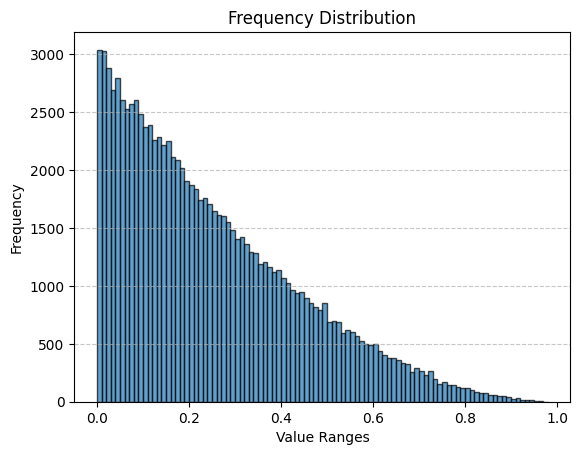

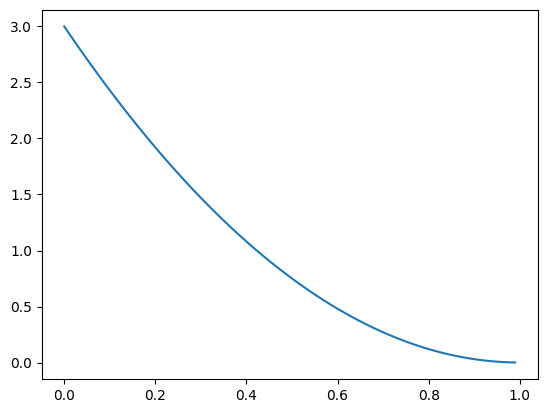

In [23]:
plotter(X , 0.01)
P =[i/100 for i in range(100)]
Q = [3*(1-x/100)**2 for x in range(100)]
plt.plot(P , Q)

In [24]:
# uniform generatation from set {1 , 3 ,5,.... , 9999}

In [25]:
def disc(N):
    A = np.zeros(N)
    for i in range(N):
        u = np.random.uniform()
        A[i]=math.floor(u*5000)*2+1
    return A

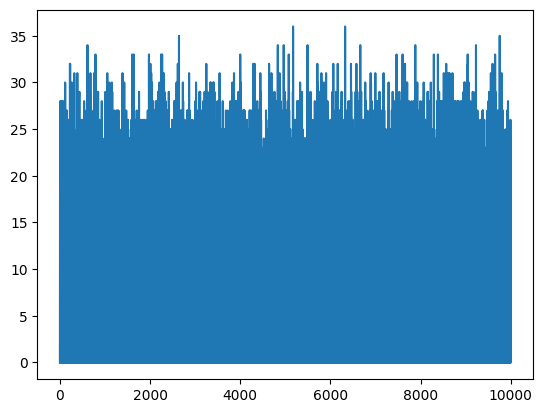

In [26]:
D = disc(100000)
A = np.zeros(10000)
for i in range(100000):
    A[int(D[i])]+=1
X = [i for i in range(10000)]
plt.plot(X , A)

In [27]:
#generate normal dist function two methods box-muller and marsaglia-bray(spelling might be wrong)
def box_muller(N):
    A = np.zeros(N)
    for i in range(N):
        u1 = np.random.uniform()
        u2 = np.random.uniform()
        r = (-2 * math.log(u1))**(1/2)
        theta = 2* math.pi * u2 
        A[i] = r * math.sin(theta)
    return A

In [28]:
Norm = box_muller(10000)

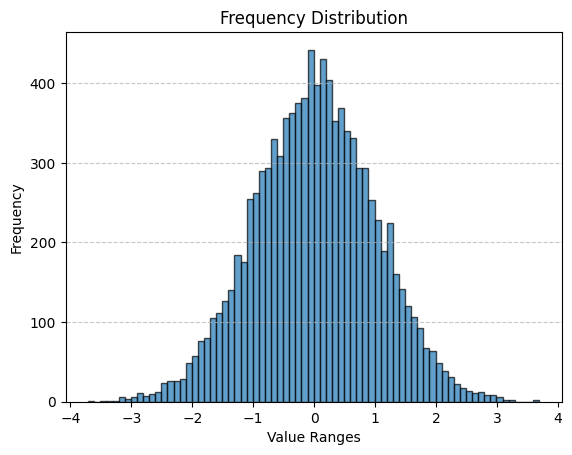

In [29]:
plotter(Norm , 0.1)

In [30]:
def mar_bray(N):
    A = np.zeros(N)
    for i in range(N):
        u1 = np.random.uniform()
        u2 = np.random.uniform()
        u1 = 2*u1-1
        u2 = 2*u2-1
        while(u1**2 + u2**2 >1):
            u1 = np.random.uniform()
            u2 = np.random.uniform()
            u1 = 2*u1-1
            u2 = 2*u2-1
        z1 = u1 * (-2* math.log(u1**2 + u2**2)/(u1**2 + u2**2))**(1/2)
        A[i]=z1
    return A


In [31]:
normm = mar_bray(10000)
print("mean and var of this generation is")
print(normm.mean())
print(normm.var())

mean and var of this generation is
0.013062726251315349
1.0073418538108485


mean is close to 0 and variance is close to 1

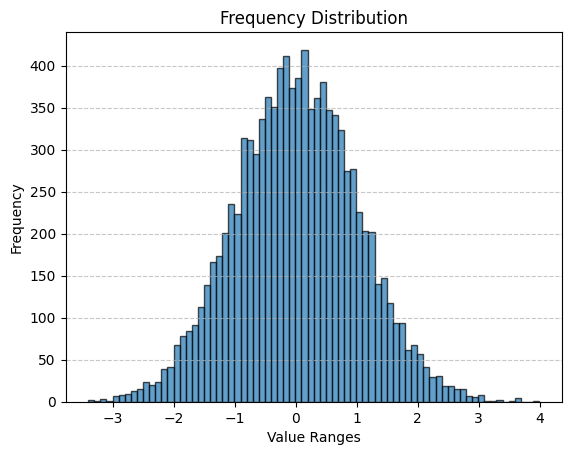

In [32]:
plotter(normm, 0.1)

In [33]:
def bivar_normal(mu , sigma , N ):
    Z1 = box_muller(N)
    Z2 = box_muller(N)
    A = np.zeros(N)
    B = np.zeros(N)
    ro = sigma[0][1]/(((sigma[0][0])**(0.5))*((sigma[1][1])**(0.5)))
    for i in range(N):
        A[i] = mu[0] + Z1[i] * ((sigma[0][0])**(0.5))
        B[i] = mu[1]+ Z1[i] * ro *((sigma[1][1])**(0.5)) + Z2[i] * (1-ro*ro)**(0.5) *((sigma[1][1])**(0.5))
    return A ,B

In [34]:
mu = [5,8]
sig1 = [[9 , 6 ],[6 , 4]]
sig2 = [[9 , -6 ],[-6 , 4]]
sig3 = [[9 , 3 ],[3 , 4]]
sig4 = [[9 , -3 ],[-3 , 4]]
A , B = bivar_normal(mu , sig1,10000)
C , D = bivar_normal(mu , sig2 ,10000)
E , F = bivar_normal(mu , sig3 ,10000)
G , H = bivar_normal(mu , sig4 ,10000)


In [51]:
import plotly.graph_objects as go
def plott_2d(x , y):
    plt.hist2d(x, y, bins=100, cmap='Blues')
    plt.colorbar(label='Counts')
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title('2D Histogram')
    plt.show()


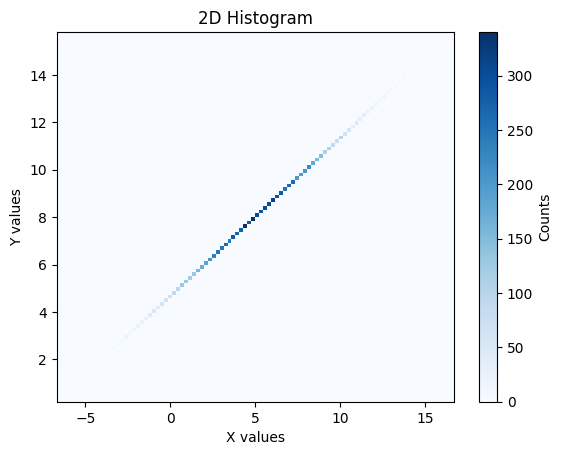

In [52]:
plott_2d(A ,B)


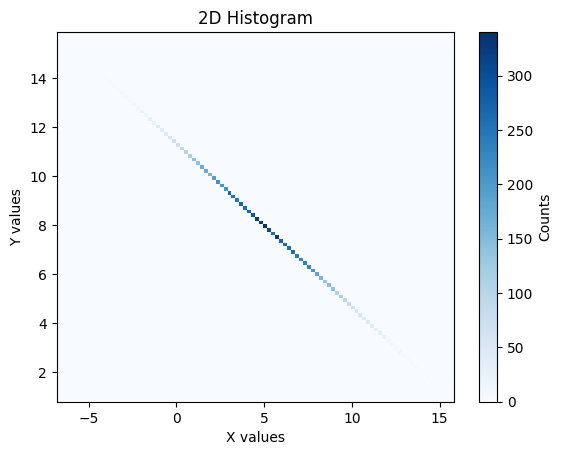

In [53]:
plott_2d(C ,D)

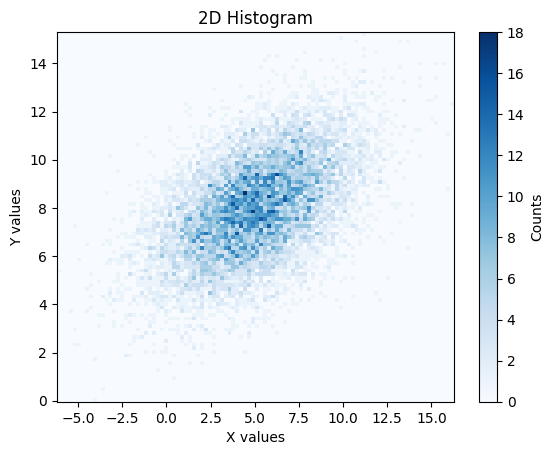

In [54]:
plott_2d(E ,F)

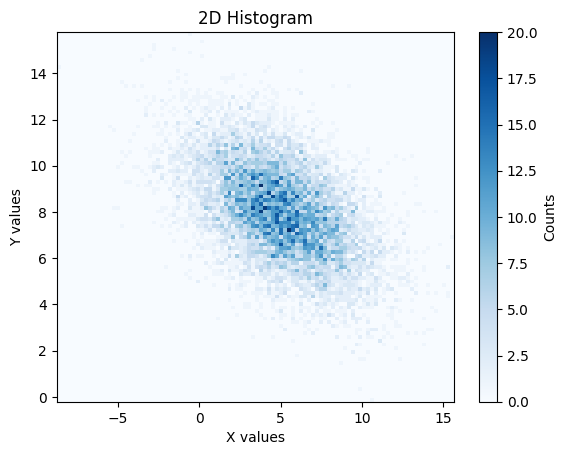

In [55]:
plott_2d(G ,H)

# error and estimation
sig^2 is nt idrectly calculatable always but its estimates are sn = 1/(n-1)* (sum(Yi-mu)^2)
sig_cap^2 = 1/n*(sum(Yi-mu)^2)
and var(mu) (called avarage squared error of generation )=sig^2/n
 95% confidence interval 
 (mu -+ 1.96 *s/n)
. Similarly 99% confidence interval
can be found as  (mu -+ 2.58 *s/n)


In [60]:
# exp of exp(sqrt(u))
def ret_avg(N):
    A = np.zeros(N)
    for i in range(N):
        A[i] = math.exp((np.random.uniform())**0.5)
    return A.mean() , A.std()

In [61]:
print(ret_avg(100)[0])
print(ret_avg(1000)[0])
print(ret_avg(10000)[0])
#should be 2 theoretically

1.98546671009402
2.0078472634142526
2.0052298441760823


In [66]:
#confidence interval 
rt = ret_avg(100)
x = rt[0] - (rt[1]/(100**0.5))*1.96
y = rt[0] + (rt[1]/(100**0.5))*1.96
print(f"Range is from {x:.2f} to {y:.2f}")

Range is from 1.87 to 2.06


In [68]:
rt = ret_avg(10000)
x = rt[0] - (rt[1]/(10000**0.5))*1.96
y = rt[0] + (rt[1]/(10000**0.5))*1.96
print(f"Range is from {x:.2f} to {y:.2f}")

Range is from 1.99 to 2.01
0.44217163774713775


In [69]:
rt = ret_avg(100000)
x = rt[0] - (rt[1]/(100000**0.5))*1.96
y = rt[0] + (rt[1]/(100000**0.5))*1.96
print(f"Range is from {x:.2f} to {y:.2f}")

Range is from 2.00 to 2.01
